# Regression

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

The report will be as follows : 
1. Implementation of all classes : Simple Regression, Polynomial regression, Gradient Descent, Ridge, Lasso, Robust, and fitting on 100 points in 2D.  
2. Generating, still in 1D, 10k points to compare the time needed for each model. 
3. Generating 10k points in 20D to compare RMSE for each model and the time needed
4. Real case on bike forecasting. 

# Implementation of various regression classes

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = \theta x + b
$$
where $\beta$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

Matplotlib is building the font cache; this may take a moment.


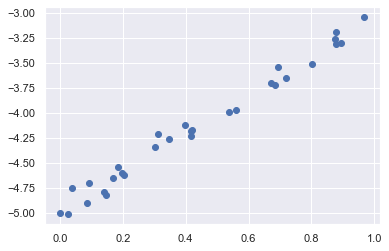

In [2]:
n = 30 # Number of points 

rng = np.random.RandomState(1)
x =  rng.rand(n)
y = 2 * x - 5 + 0.1* rng.randn(n)
plt.scatter(x, y);

## Multivariate Closed Form Class

The MultivariateLinearRegression class is a method which fits a matrix $X$ and an array $y$ as inputs, and returns an array of coefficients

We know that in practice, if we have a lot of data points, we don't have the computational power to invert X. 
We will implement both classes, and plot the computational time for a number of points increasing. 

Important : the classes expect arrays of arrays. For example : X = [[1,2], [2,1], ... []]
We thus need to make sure that we compute right when we have only 1 feature, as this is the case in this first example. 

In [3]:
class MultivariateLinearRegression_ClosedForm():
    # Class for linear regression solving least-squares:

    def __init__(self,):
        self.coef_ = None
        
    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """

        X_new = np.ones((X.shape[0], X.shape[1]+1)) #these 3 lines add an intercept
        X_new[:, 1:] = X
        X_aug = X_new
        
        self.coef_ = np.dot(np.dot(np.linalg.inv(np.dot(X_aug.T, X_aug)), X_aug.T), y) #we use the closed form solution 
        
    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """

        X_new = np.ones((X.shape[0], X.shape[1]+1))
        X_new[:, 1:] = X
        X_aug = X_new

        y_pred = np.dot(X_aug, self.coef_)

        return y_pred

If we try our model on the data and scatter the data points and the fitted line:

In [4]:
x_reshaped=x.reshape(-1,1) #Need to reshape to use the class
x_reshaped[:2] #should be 1D array

array([[0.417022  ],
       [0.72032449]])

In [5]:
model = MultivariateLinearRegression_ClosedForm()
model.fit(x_reshaped,y)

Print the scope and the intercept:

In [6]:
print("Model slope:    ", model.coef_[1])
print("Model intercept:",model.coef_[0])

Model slope:     1.9292055341290537
Model intercept: -4.976046835178196


We have a pretty good fit! (Our synthetic data generation was with 2 and -5 coefficients).

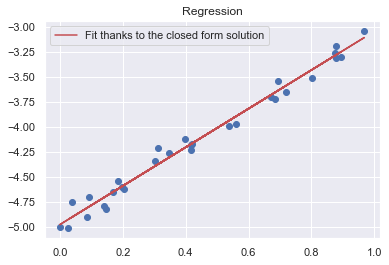

In [7]:
plt.scatter(x, y)
plt.plot(x, model.predict(x_reshaped), c='r', label = "Fit thanks to the closed form solution")
plt.title("Regression")
plt.legend();

## Multivariate Gradient Descent Class

In practice, we would rather use Gradient Descent than the closed form solution, as it can be computational expensive to invert the $X^TX$ matrix. 

We know that the formula of the gradient is : 
$$ \frac{\partial{J(\theta)}}{\partial{\theta}_{j}} = \frac{1}{m}X^T(X\theta-Y) $$ 

In [8]:
class MultivariateLinearRegression_GradientDescent():
    
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.coef_ = None
    
    def fit(self, X, y):

        X_new = np.ones((X.shape[0], X.shape[1]+1)) #these 3 lines add an intercept
        X_new[:, 1:] = X
        X_aug = X_new

        self.coef_ = np.zeros(X.shape[1] + 1) #initialization of the coefficients

        for _ in range(self.num_iterations): #gradient descent
            gradient = (1/X_aug.shape[0]) *  np.dot(X_aug.T, np.dot(X_aug, self.coef_) - y ) 
            self.coef_ -= self.learning_rate * gradient
        
    def predict(self, X):
        
        X_new = np.ones((X.shape[0], X.shape[1]+1))
        X_new[:, 1:] = X
        X_aug = X_new

        y_pred = np.dot(X_aug, self.coef_) #we assume that the coefficients have been learned

        return y_pred

In [9]:
model = MultivariateLinearRegression_GradientDescent(learning_rate=0.01,num_iterations=100)
model.fit(x_reshaped,y)
print(f' The coefficients for this model are: {model.coef_}')

 The coefficients for this model are: [-2.45826302 -0.84819524]


We can see that the coefficients are not well fitted for only 100 iterations with a learning rate of 0.01. 
Let's plot the relationship between the learning rate and the number of iterations needed for the coefficients to converge rightly. 

In [10]:
#Storing the results to plot them after. 
a_coeffs=[]
b_coeffs=[]
lr_values = [0.001, 0.01, 0.1, 0.5]

for lr in lr_values:
    a_coeff=[]
    b_coeff=[]
    for iter in range(100,10000,100): 
        model = MultivariateLinearRegression_GradientDescent(learning_rate = lr, num_iterations=iter)
        model.fit(x_reshaped,y)
        a_coeff.append(model.coef_[1])
        b_coeff.append(model.coef_[0])
    a_coeffs.append(a_coeff)
    b_coeffs.append(b_coeff)


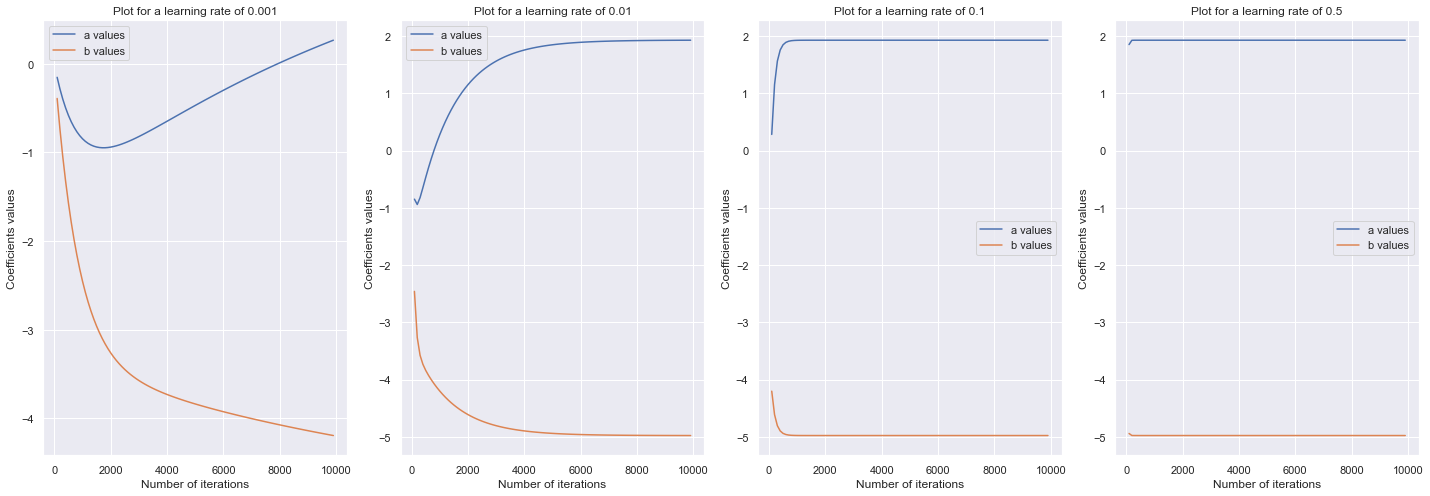

In [11]:
fig, axes = plt.subplots(1, 4,figsize=(20, 7))

x_values = [i for i in range(100,10000,100)]
for i in range(4):
    axes[i].plot(x_values ,a_coeffs[i], label = f"a values" )
    axes[i].plot(x_values ,b_coeffs[i], label = f"b values")
    axes[i].set_xlabel('Number of iterations')
    axes[i].set_ylabel('Coefficients values')
    axes[i].set_title(f'Plot for a learning rate of {lr_values[i]}')
    axes[i].legend()

plt.tight_layout()
plt.show()

We can see that for such a simple problem here, we can take a high learning rate. 

It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our multidimensional linear model:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [12]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(5, include_bias=False) # with or without intercept
poly.fit_transform(x[:, None])

array([[   2.,    4.,    8.,   16.,   32.],
       [   3.,    9.,   27.,   81.,  243.],
       [   4.,   16.,   64.,  256., 1024.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression

With this transform, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

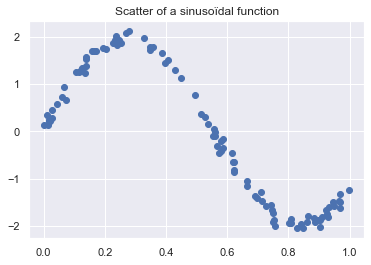

In [13]:
n = 100
x = rng.rand(n)
y_sin = 2 * np.sin(1.8*np.pi*x) + 0.1 * rng.randn(n)


plt.scatter(x, y_sin);
plt.title("Scatter of a sinusoïdal function");

Here, we will fit the data on this range of points (x=0 to 1), and do predictions on a new set of points evenly spaced from 0 to 1 too, using np.linspace.

In [14]:
n=50 #test sanmple

x_test = np.linspace(0,1,n)
y_test = 2 * np.sin(1.8*np.pi*x_test) + 0.1 * rng.randn(n)

In [15]:
predictions = []
degrees = [i for i in range(1,6)] #up to degree 5

for degree in degrees:
    poly = PolynomialFeatures(degree, include_bias=False) # without intercept

    x_poly=poly.fit_transform(x[:, None]) #dimension augmentation for x train 
    x_test_poly = poly.fit_transform(x_test[:, None])  #same dimension augmentation for x train 
    model = MultivariateLinearRegression_ClosedForm()
    model.fit(x_poly,y_sin) #we fit on the training set 
    predictions.append(model.predict(x_test_poly)) #we predict on the test set 
    print(model.coef_)

[ 1.79672938 -3.78976751]
[ 1.13991993  0.81436919 -4.7107924 ]
[ -0.25438626  20.53769311 -54.96251027  33.48668421]
[ -0.08994498  16.50420996 -35.19612887   1.36323348  16.48477241]
[ 7.76476477e-02  1.00969835e+01  1.36682893e+01 -1.33075812e+02
  1.69710692e+02 -6.16795310e+01]


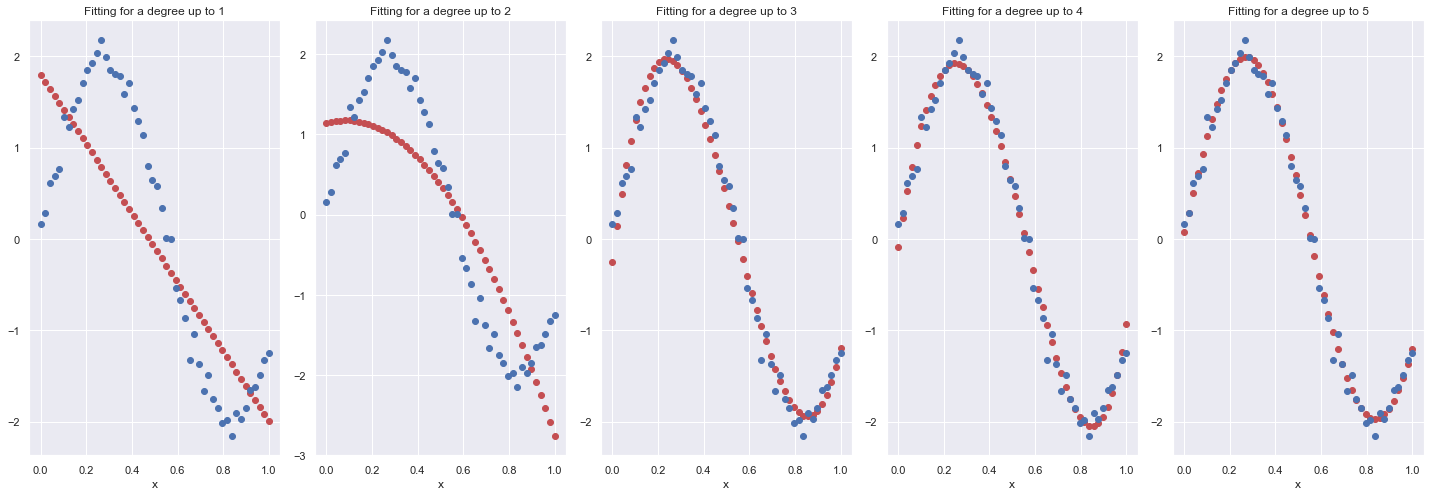

In [16]:
fig, axes = plt.subplots(1, 5,figsize=(20, 7))

for i in range(5) : 
    axes[i].scatter(x_test ,predictions[i], c = "r", label = "Predictions")
    axes[i].scatter(x_test, y_test)
    axes[i].set_xlabel('x')
    axes[i].set_title(f'Fitting for a degree up to {i+1}')

plt.tight_layout()
plt.show()

We can wonder for degree 5, what is the value of each polynomial coefficient : 

In [17]:
model.coef_ #as this is the last model fitted in the loop

array([ 7.76476477e-02,  1.00969835e+01,  1.36682893e+01, -1.33075812e+02,
        1.69710692e+02, -6.16795310e+01])

We thus have : 
$$ y =  -0.02 +   11.5x +  8.72 x^2 + -124 x^3 + 161 x^4 +   -58.4 x^5$$

The last 3 coefficients have a dominant effect. 

Analysis : 
- we can see that we need at least a degree 3-4 to have interesting results !
- we can see a line , and a quadratic outcome for degres 1 and 2 as expected

Thus, even with a linear model, we can fitting a non linear equation. 

- As we increase the degree of the polynomial, the model becomes more flexible and can better fit the training data. However, it also becomes more prone to overfitting, which means it might not generalize well to new, unseen data.
- As we increase the degree of the polynomial, the matrix $X$ gets augmented with additional columns corresponding to the higher-order terms $(X^2, X^3, ...)$. This leads to changes in the values of $X^TX$, affecting the computation of the coefficients.


*How can we avoid overfitting?*

Overfitting happends when the model learns very well on the training data, but fails to generalize on unseen data. It might happen when the model is too complex. 

We should follow Occam's Razor and prefer a simple but explainable model when it is possible. To do so, we can use regularization terms, which will penalize too complex models. 

Regularization is the subject of the following paragraphs. 

## Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting.

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{i=1}^n \beta_i^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.

In [18]:
class RidgeRegularization():
    # Class for ridge regression with closed form equation:

    def __init__(self, alpha):
        self.coef_ = None
        self.alpha_ = alpha
        
    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """

        X_new = np.ones((X.shape[0], X.shape[1]+1))
        X_new[:, 1:] = X
        X_aug = X_new
        
        
        # Step 3: Update self.coef_ using matrix multiplication
        self.coef_ = np.dot(np.dot(np.linalg.inv(np.dot(X_aug.T, X_aug)+self.alpha_*np.identity(len(X_aug[0]))), X_aug.T), y)
        
    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """

        X_new = np.ones((X.shape[0], X.shape[1]+1))
        X_new[:, 1:] = X
        X_aug = X_new

        y_pred = np.dot(X_aug, self.coef_)

        return y_pred

Let's try the model in our data and plot the coefficients of the regression.

In [19]:
Ridge_model = RidgeRegularization(alpha = 0.01)

Ridge_model.fit(x_reshaped, y)
print(Ridge_model.coef_) 

[-4.9678505   1.91418562]


The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.

In [20]:
a_coeffs=[]
b_coeffs=[]
alphas = np.logspace(-4,3,1000)

for alpha in alphas : 
    ridge_model = RidgeRegularization(alpha = alpha)
    ridge_model.fit(x_reshaped, y)
    a_coeffs.append(ridge_model.coef_[1])
    b_coeffs.append(ridge_model.coef_[0])

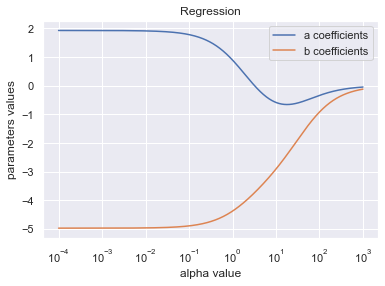

In [21]:
plt.plot(alphas, a_coeffs, label ="a coefficients")
plt.plot(alphas, b_coeffs, label = "b coefficients")
plt.xscale('log')
plt.xlabel('alpha value')
plt.ylabel('parameters values')
plt.title("Regression")
plt.legend();

We can see that as expected, the higher we penalize (alpha increasing), the more intensively the coefficients will tend to 0. 

*How can we choose the $\alpha$ parameter?*

$\alpha$ is a hyperparameter than we can fine tune. 
We can choose the best $\alpha$ parameter by performing a randomized GridSearchCV with various alpha coefficients and choose the best model. 

### Lasso regression ($L_1$ Regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients: 
$$P = \alpha\sum_{i=1}^n |\beta_i|

$$ Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor sparse models where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients.

In [22]:
class LassoRegularization():
    # Class for lasso regression with soft thresholding:

    def __init__(self, alpha, learning_rate=0.01, iterations=1000):
        self.coef_ = None
        self.alpha = alpha
        self.learning_rate_ = learning_rate
        self.iterations_ = iterations
        
    def fit(self, X, y):
        """ Fit the data (X, y).
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """

        def soft_threshold(coeffs): 
            return np.sign(coeffs) * np.maximum(np.abs(coeffs) - self.learning_rate_ * self.alpha, 0)

        X_new = np.ones((X.shape[0], X.shape[1]+1)) #these 3 lines add an intercept
        X_new[:, 1:] = X
        X_aug = X_new

        def gradient(X,y,coeffs, alpha): #function to sum the ols term and the soft thresholding one

            n_samples, n_features = X.shape 

            residuals = y - np.dot(X, coeffs)
            ols_term = -2 * np.dot(X.T, residuals) / n_samples
            alpha_term = alpha * np.sign(coeffs)

            return ols_term + alpha_term

        coef_ = np.ones(X_aug.shape[1]) #initialization of the coefficients
        
        for _ in range(self.iterations_):

            grad = gradient(X_aug,y, coef_,self.alpha) #First, we compute the gradient with the OLS term adding the sign of the coefficient
            coef_ = coef_ - self.learning_rate_ * grad #Second, we apply a classical gradient descent
            coef_ = soft_threshold(coef_) #Finally, we apply soft thresholsing to keep or not the contribution of the coefficient

        self.coef_ = coef_


    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """

        X_new = np.ones((X.shape[0], X.shape[1]+1))
        X_new[:, 1:] = X
        X_aug = X_new

        return np.dot(X_aug, self.coef_)

For our example to be better understandable, we will only fit on 7 little beautiful points. 

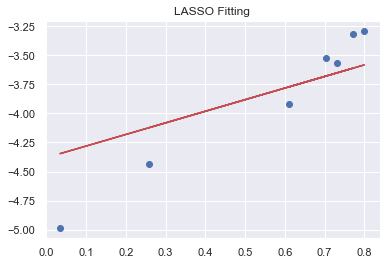

In [23]:
n = 7
x =  rng.rand(n)
x_reshaped=x.reshape(-1,1)
y = 2 * x - 5 + 0.1* rng.randn(n)

LASSO_model = LassoRegularization(alpha = 1e-05)
LASSO_model.fit(x_reshaped, y)

plt.scatter(x,y)
plt.plot(x, LASSO_model.predict(x_reshaped), c="r", label = "Fit of LASSO Model")
plt.title("LASSO Fitting");

Usually, we would use GridSearchCV to find the best $\alpha$ parameter. 

Here, we have the chance to see the fitting, so for once, let's plot the results ! 

For each value of alpha in $[0.00001,0.001, 0.01, 0.1, 0.3]$, we will generate 7 random points to see the effect of the regularization.   

So each row of the following plot is fitting with the same value of $\alpha$.

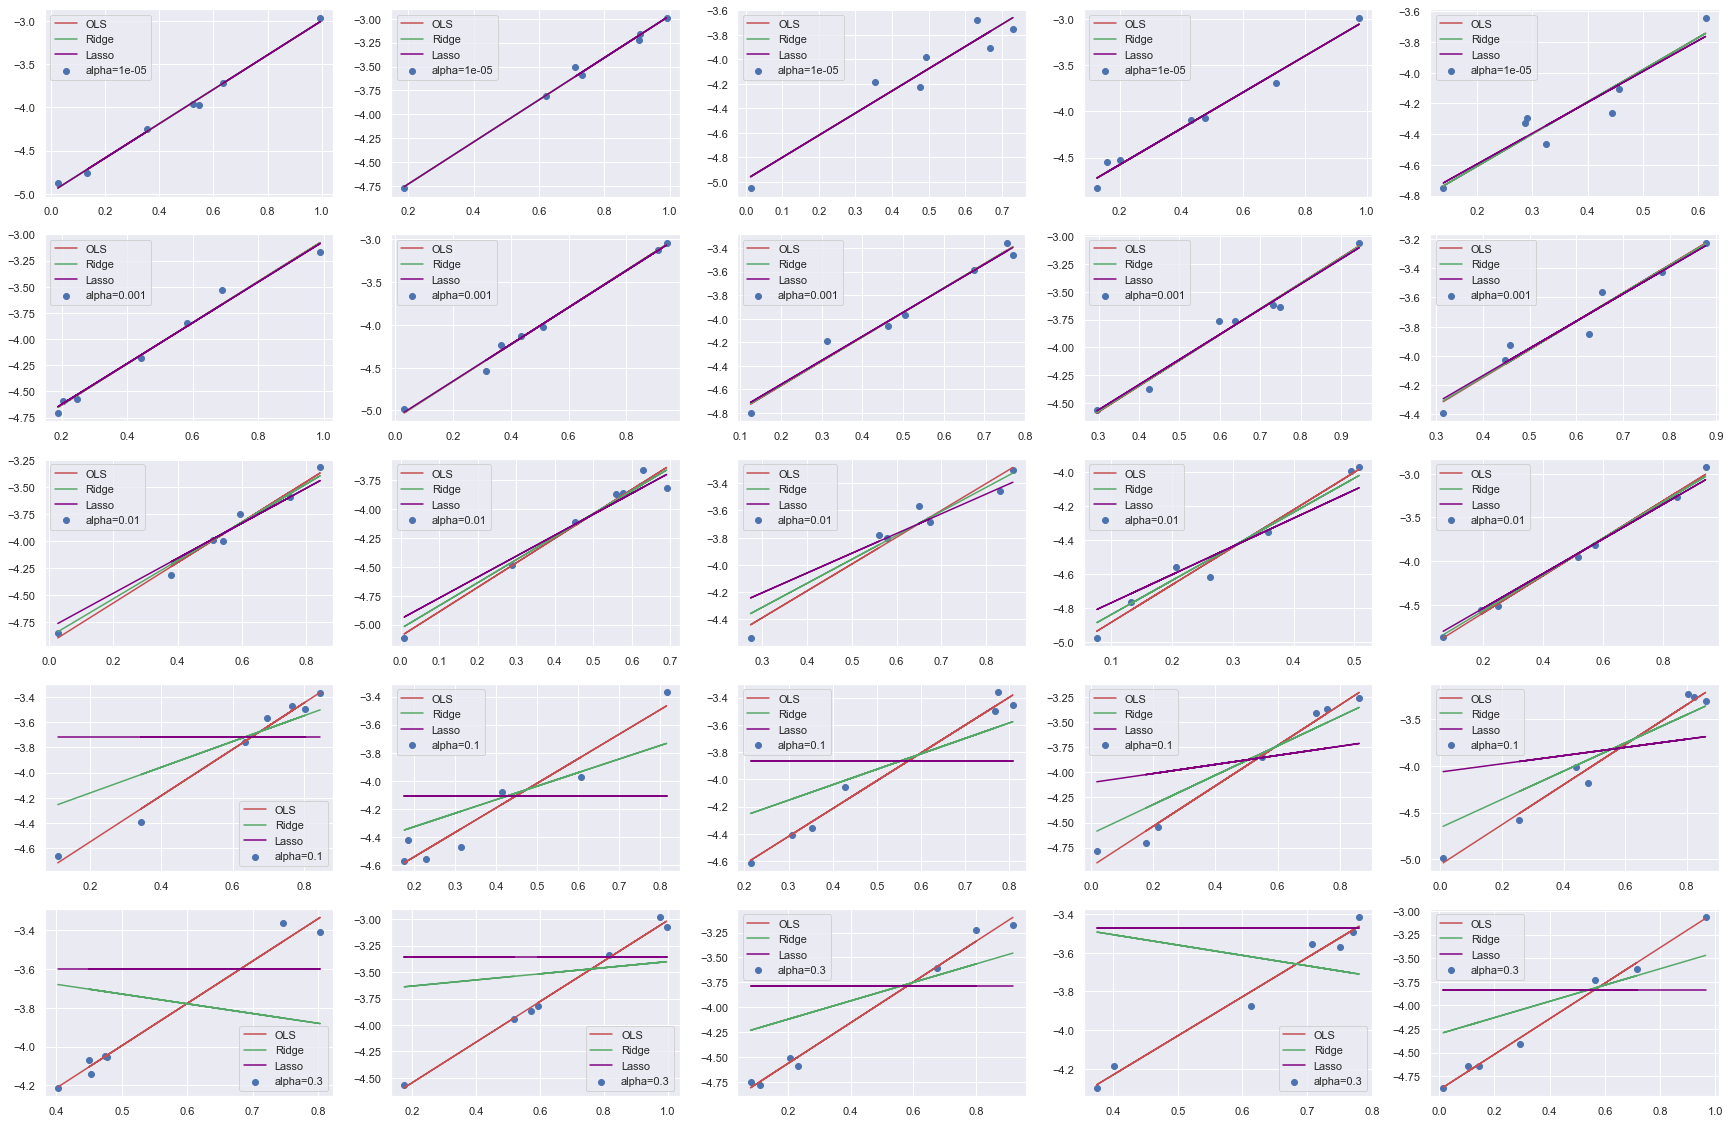

In [24]:
fig, ax = plt.subplots(5, 5, figsize=(30, 20))
alpha_values = [0.00001,0.001, 0.01, 0.1, 0.3]

for j in range(5):
    for i in range(len(alpha_values)):

        x =  rng.rand(7)
        x_reshaped=x.reshape(-1,1)
        y = 2 * x - 5 + 0.1* rng.randn(7)

        OLS_model = MultivariateLinearRegression_ClosedForm()
        ridge_model = RidgeRegularization(alpha = alpha_values[i])
        LASSO_model = LassoRegularization(alpha = alpha_values[i],iterations=10000)

        OLS_model.fit(x_reshaped, y)
        ridge_model.fit(x_reshaped, y) 
        LASSO_model.fit(x_reshaped, y) 

        ax[i][j].scatter(x,y, label=f"alpha={alpha_values[i]}")
        ax[i][j].plot(x, OLS_model.predict(x_reshaped), c="r", label = "OLS")
        ax[i][j].plot(x, ridge_model.predict(x_reshaped), c="g", label = "Ridge")
        ax[i][j].plot(x, LASSO_model.predict(x_reshaped), c="purple", label = "Lasso")

        ax[i][j].legend()

**Analysis:** 
- Here , I put 10k iterations for LASSO, to be sure that there is convergence. 
- As expected, we can see that increasing the value of alpha penalizes more and thus the model struggles more to fit the data. The values of the slopes are closer to 0. 

NB : I put same penalization value for Ridge and Lasso, looking from up to down.

## Robust regression

Linear least-squares estimates can behave badly when the error distribution is not normal, particularly when
the errors are heavy-tailed. One remedy is to remove influential observations from the least-squares fit. Another approach, termed robust regression, is to employ a fitting criterion that is not as vulnerable as least squares to unusual data.

The most common general method of robust regression is M-estimation, introduced by Huber (1964).

Fill in the following class:

We use the IRLS approach : 
1. Implement the weighting function

2. Compute the IRLS Weight matrix : $$W_k = diag(\omega(y-X\beta_{k}))$$

3. Update the parameters : $$\forall k \in N, \beta_{k+1} = (X^TW_kX)^{-1}X^TW_ky$$

In [25]:
class RobustRegression():
    # Class for robust linear regression:

    def __init__(self, potential, k, e_tol=10**-4):
        self.coef_ = None
        self.potential_ = potential
        self.k_ = k
        self.e_tol = e_tol #Tolerance for the convergence criteria
        
    def mad(self, x): #median absolute deviation (to the median)
        """ Calculate mad."""
        
        return np.median(np.abs(x - np.median(x))) 
        
    def weight_function(self, x, potential, k):
        """ Calculate weigth of point residual x.
    
        Parameters:
        -----------
        x: standardize by mad residual
        potential: name of the potential to use:
         "huber" or "bisquare"
        k: parameter of the potential function
        
        Returns:
        -----
        weight: weight corresponding to x 
        """
        

        if potential == "huber": #it's the weight associated to a residual, not the loss function
            return np.where(np.abs(x) <= k,1, k/np.abs(x))

        if potential =="bisquare": # value k = 4.68 is usually used
            return np.where(np.abs(x)<=k, (1-(x/k)^2)^2, 0)

    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """
        
        LR = MultivariateLinearRegression_ClosedForm()
        LR.fit(X, y)
        self.coef_ = LR.coef_
        
        mse = 10**6

        X_new = np.ones((X.shape[0], X.shape[1]+1)) #these 3 lines add an intercept
        X_new[:, 1:] = X
        X_aug = X_new

        while True : #the convergence criteria is as soon as the mse error doesn't decrease much anymore from one iteration to the other

            ek = y - np.dot(X_aug, self.coef_) #errors vectors
    
            Wk = np.diag(self.weight_function(ek,self.potential_,self.k_ ))
    
            
            left_elem_coef = np.dot(np.dot(X_aug.T, Wk), X_aug)
            right_elem_coef = np.dot(np.dot(X_aug.T, Wk), y)

            self.coef_ = np.dot(np.linalg.inv(left_elem_coef), right_elem_coef)

            elem_for_mse = np.dot(Wk**0.5, np.dot(X_aug, self.coef_)-y)
    
            prev_mse = mse #storing mse to compare the change
            mse = np.dot(elem_for_mse.T, elem_for_mse)*1/X_aug.shape[0] #new mse computed

            if abs((prev_mse-mse)/prev_mse) >self.e_tol : #if the relative change in mse is > e_tol
                prev_mse = mse
            else : 
                break 
        
    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """
        

        X_new = np.ones((X.shape[0], X.shape[1]+1))
        X_new[:, 1:] = X
        X_aug = X_new

        return np.dot(X_aug, self.coef_)

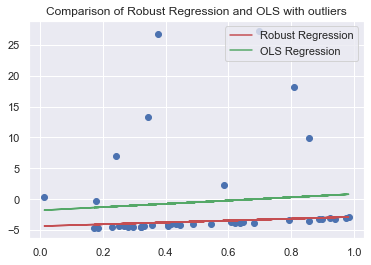

In [26]:
n = 40
x =  rng.rand(n)
x_reshaped=x.reshape(-1,1)
y = 2 * x - 5 + 0.1* rng.randn(n)

num_outliers = 10
outliers_indices = rng.choice(n, num_outliers, replace=False)
y[outliers_indices] = y[outliers_indices] + np.abs(20 * rng.randn(num_outliers))

robust_model = RobustRegression(potential = "huber", k =1.35 )
OLS_regression = MultivariateLinearRegression_ClosedForm()

robust_model.fit(x_reshaped, y)
OLS_regression.fit(x_reshaped, y)

plt.scatter(x,y)
plt.plot(x, robust_model.predict(x_reshaped), c="r", label = "Robust Regression")
plt.plot(x, OLS_regression.predict(x_reshaped), c = 'g', label ="OLS Regression")
plt.title("Comparison of Robust Regression and OLS with outliers")
plt.legend();

As expected, the model doesn't take into account the outliers in while fitting. 

The slope follows the majority of the points that lies on the line. 

# Time analysis to compare the performance of each model 

Here, we want to compare the performance of each model in term of time needed to fit the data. 

We will fit the same number of points, each model having its own convergence criteria:

- OLS : Closed Form Solution, 
- Gradient Descent : 1k iterations, 
- Ridge : Closed Form solution, 
- Lasso : 1k iterations, 
- Robust Model : e_tol = $10^{-4}$

Of course, each hyperparameter has its own influence on the convergence's speed, but at least we will have an intuition. 

## 1D case

We stay in a simple relationship :
$ y = 2x-5 $ just increasing the number of data points. 

In [27]:
n_values_to_fit = [100, 1000, 10000,20000] #Higher number of points make my VS code crash..

x_values = [rng.rand(n) for n in n_values_to_fit]
y_values = [ 2 * x - 5 + 0.1* rng.randn(len(x)) for x in x_values]

And we fit for each model: 

In [28]:
ols_model = MultivariateLinearRegression_ClosedForm()
gd_model = MultivariateLinearRegression_GradientDescent(learning_rate=0.01, num_iterations=1000)
ridge_model = RidgeRegularization(alpha = 0.01)
lasso_model = LassoRegularization(alpha=0.01, learning_rate=0.01, iterations=1000)
robust_model = RobustRegression(potential="huber", k = 1.345)

models = [ols_model, gd_model,ridge_model, lasso_model, robust_model ]
models_str = ["ols_model", "gd_model","ridge_model", "lasso_model", "robust_model" ]

In [29]:
import time
times=[]

for model in models:
    time_ = []
    for x,y in zip(x_values,y_values):
        x_reshape = x.reshape(-1,1)
        start_time = time.time()
        model.fit(x_reshape, y)
        end_time = time.time()
        time_.append(end_time-start_time)
    times.append(time_)

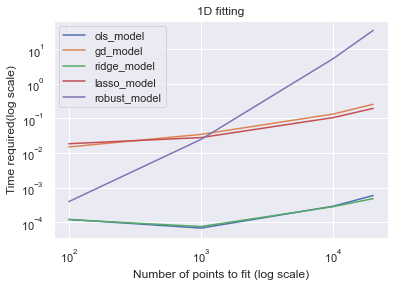

In [30]:
for i, model  in zip(range(len(models)), models_str ): 
    plt.plot(n_values_to_fit, times[i], label = f'{model}')

plt.xlabel("Number of points to fit (log scale)")
plt.ylabel("Time required(log scale)")
plt.yscale('log')
plt.xscale('log')
plt.title('1D fitting')
plt.legend();

We can see that the fastest algoritm is ridge. Robust is by far the most time consuming. 

Surprisingly, OLS takes less time for 1k  points than 100, and performs better than Gradient Descent.
NB : running with more points makes my VS crash. 

## Multidimensional case

Of course our linear regression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building a toy example:

In [31]:
rng = np.random.RandomState(1)
X = 3 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model=MultivariateLinearRegression_ClosedForm()
model.fit(X, y)
print(model.coef_)

[ 0.5  1.5 -2.   1. ]


In this 3D case, we obtain a perfect fit ! 

If we stick to the 2D case, we know that the linear regression defines an hyperplan that is in this case : 
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

We can plot this hyperplane :

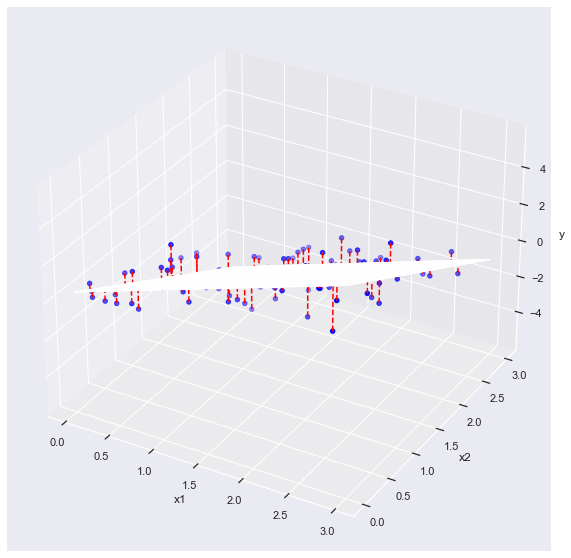

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

X = 3 * rng.rand(100, 2)
y = 0.5 + np.dot(X, [1.5, -2.]) + rng.randn(100) 

model=MultivariateLinearRegression_ClosedForm()
model.fit(X, y)
y_pred = model.predict(X)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, c='blue', marker='o', label='Data Points') # True data

# Plotting the plane 
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)
X_grid = np.c_[x1.ravel(), x2.ravel()]
y_pred_grid = model.predict(X_grid)
y_pred_grid = y_pred_grid.reshape(x1.shape)
ax.plot_surface(x1, x2, y_pred_grid, color='red', alpha=0.5, label='Regression Plane')

# Adding each projection into the plane
for i in range(len(X)):
    ax.plot([X[i, 0], X[i, 0]], [X[i, 1], X[i, 1]], [y[i], y_pred[i]], color='red', linestyle='dashed')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

### Time Analysis 

We want to know the effect on the performance if we add new features and fit.

I create a simple function that adds features. 

In [33]:
def create_multivariate_dataset(num_points= 1000, num_columns = 10):

    X = rng.randint(-10,10) * rng.rand(num_points, num_columns)
    y_bias  = rng.randint(-10,10)
    coefficients = [rng.randint(-10,10) for _ in range(num_columns)]
    y = rng.randint(-10,10) + np.dot(X, coefficients) + rng.randn(num_points) 

    return X,y,[y_bias]+coefficients

In [36]:
import time
from tqdm import tqdm
ols_model = MultivariateLinearRegression_ClosedForm()
gd_model = MultivariateLinearRegression_GradientDescent(learning_rate=0.01, num_iterations=100)
ridge_model = RidgeRegularization(alpha = 0.01)
lasso_model = LassoRegularization(alpha=0.01, learning_rate=0.01, iterations=100)
robust_model = RobustRegression(potential="huber", k = 1.345,e_tol = 10**-2)

models = [ols_model, gd_model,ridge_model, lasso_model, robust_model ]
models_str = ["ols_model", "gd_model","ridge_model", "lasso_model", "robust_model" ]

times=[]
num_dimensions = [1,5,10,20,30,40,50,100,200,300,400]

for model in models:
    print(model)
    time_ = []
    for n in tqdm(num_dimensions):
        X,y,_ = create_multivariate_dataset(num_points=100,num_columns=n)
        start_time = time.time()
        model.fit(X, y)
        end_time = time.time()
        time_.append(end_time-start_time)
    times.append(time_)

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 31.19it/s]


100%|██████████| 11/11 [00:00<00:00, 161.31it/s]


100%|██████████| 11/11 [00:00<00:00, 36.21it/s]


100%|██████████| 11/11 [00:00<00:00, 138.51it/s]


100%|██████████| 11/11 [01:50<00:00, 10.06s/it]


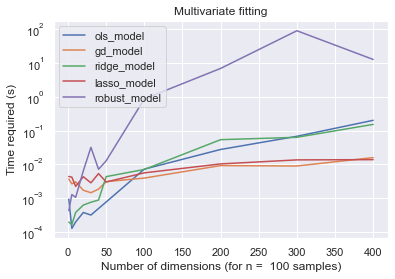

In [37]:
for i, model  in zip(range(len(models)), models_str ): 
    plt.plot(num_dimensions, times[i], label = f'{model}')

plt.xlabel("Number of dimensions (for n =  100 samples)")
plt.ylabel("Time required (s)")
plt.yscale('log')
plt.title('Multivariate fitting')
plt.legend();

Clearly, adding more dimensions as an effect on the computing time. 

Gradient Descent performs better than everyone else, especially OLS.

Robust Regression hasn't the same convergence criteria, but is still the longest one to fit. 

# Predicting Bicycle Traffic

As an example, let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.

In this section, we joinned the bike data with another dataset, and try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.

As you may now, we should use time series techniques to analyze this dataset, instead, as a first simple approach, we will perform a multivariate linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

Let's start by loading the dataset:

In [38]:
import pandas as pd
daily = pd.read_csv('data.csv', index_col='Date', parse_dates=True)

Outline : 
1. Data Analysis and data visualisation
2. Preprocessing : add some cycling into days, normalize
3. Fit every model
4. Comparing mse to the baseline : bycicle the day just before

### 1. Data Analysis

In [39]:
daily = daily.reset_index()
daily.head()

,Date,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
0,2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1,0.000000
1,2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1,0.002740
2,2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1,0.005479
3,2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1,0.008219
4,2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1,0.010959


1. We understand that each row is a date, and we have just booleans for the day of the week. 
2. Moreover, we can know if there it was a holiday, and some weather conditions. 
3. Finally, annual has the same effect as an index : it is just gradually increasing over time. It can have an effect if there is a trend on the whole dataset : increasing or decreasing. 

In [40]:
import plotly.express as px
fig = px.line(daily, x="Date", y = "Total")
fig.show()

We can clearly see a seasonality over the year (less in Winter) and over the week. 

We can wonder the mean of each day : 

In [ ]:
px.pie(daily, "holiday")

The vast majority of days are regular days. Let's see if it impact a lot the y:

In [ ]:
daily.groupby("holiday").mean()["Total"]

holiday
0.0    2657.876329
1.0    1755.620690
Name: Total, dtype: float64

People tend to use the bicyle as their everyday way to move, and don't use it more during holidays. The difference is significant. 

We can wonder the correlation between all variables. 

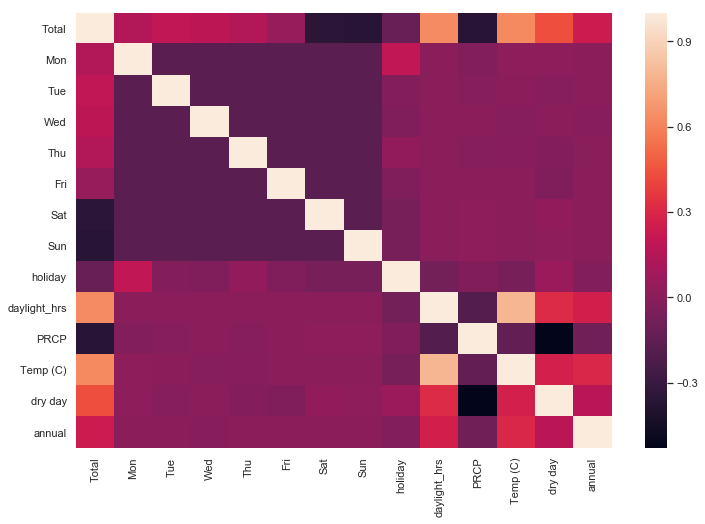

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(daily.corr());

Analysis : 
1. The highest **positive** correlations to the target variable are temperature, daylight hours and dryness (>0.5)
2. The highest **negative** correlations to the target variable are weekeend days and PRCP to the target variable (-0.5 at maximum).

The can conclude that the weather variables are the one that affect the most the target variable. 

In [ ]:
px.histogram(daily.Total)

### 2. Preprocessing

With this in place, we can choose the columns to use, and fit a linear regression model to our data:

Let's see if we have any missing values.

In [ ]:
(daily.isna().sum()/daily.shape[0]*100).sort_values(ascending = False)

annual          0.0
dry day         0.0
Temp (C)        0.0
PRCP            0.0
daylight_hrs    0.0
holiday         0.0
Sun             0.0
Sat             0.0
Fri             0.0
Thu             0.0
Wed             0.0
Tue             0.0
Mon             0.0
Total           0.0
Date            0.0
dtype: float64

We don't have any missing values ! Hurray!

In [ ]:
daily["shift"] = daily.shift()["Total"]
daily_with_lag = daily[1:] #need to get rid of the first value... #rip
daily_with_lag.head()

,Date,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,shift
1,2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1,0.002740,3521.0
2,2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1,0.005479,3475.0
3,2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1,0.008219,3148.0
4,2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1,0.010959,2006.0
5,2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.987503,0.0,14.45,1,0.013699,2142.0


We need to add cycling values to our data : an

First, we put the days on a scale from 1 to 7 (I don't trust the order of the data, so I map according to the data and don't generate repetitions begining at 4 being thursday):

In [ ]:
daily_with_days = daily_with_lag.copy()
daily_with_days['week_day'] = (daily_with_days==1).idxmax(axis=1)
day_mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
daily_with_days['week_day'] = daily_with_days['week_day'].map(day_mapping)
daily_with_days.head()

,Date,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,shift,week_day
1,2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1,0.002740,3521.0,4
2,2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1,0.005479,3475.0,5
3,2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1,0.008219,3148.0,6
4,2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1,0.010959,2006.0,7
5,2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.987503,0.0,14.45,1,0.013699,2142.0,1


Moreover, we can extract information from the date : 

In [ ]:
def year_day(date_to_convert):
  #Function that returns the day of the year as an integer
  return  date_to_convert.timetuple().tm_yday

daily_with_days["month"] = pd.to_datetime(daily_with_days.Date).dt.month
daily_with_days["month_day"] = pd.to_datetime(daily_with_days.Date).dt.day
daily_with_days["year_day"] = pd.to_datetime(daily_with_days.Date).apply(year_day)
daily_with_days["week"] = pd.to_datetime(daily_with_days.Date).dt.week
daily_with_days.head()

,Date,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,...,PRCP,Temp (C),dry day,annual,shift,week_day,month,month_day,year_day,week
1,2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,13.60,1,0.002740,3521.0,4,10,4,278,40
2,2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,15.30,1,0.005479,3475.0,5,10,5,279,40
3,2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,15.85,1,0.008219,3148.0,6,10,6,280,40
4,2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,15.85,1,0.010959,2006.0,7,10,7,281,40
5,2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,14.45,1,0.013699,2142.0,1,10,8,282,41


And we take the cosinus and sinus of every feature to make them cylical: 

In [ ]:
df = daily_with_days.copy()

col_to_change = ["year_day", "week_day", "week", "month", "month_day"]

for col in col_to_change :

  new_col_sin_name = col + "_sin"
  new_col_cos_name = col + "_cos"

  if col == 'year_day': 
     dividing_constant = 365
  elif col == 'week_day': 
     dividing_constant = 7
  elif col == 'week': 
     dividing_constant = 52
  elif col == 'month_day': 
     dividing_constant = 31

  df[new_col_sin_name] = np.sin(2 * np.pi * df[col]/dividing_constant)
  df[new_col_cos_name] = np.cos(2 * np.pi * df[col]/dividing_constant)

  df[new_col_sin_name] = df[new_col_sin_name].astype("float")
  df[new_col_cos_name] = df[new_col_cos_name].astype("float")

df = df.drop(columns =col_to_change)

In [ ]:
df.head()

,Date,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,...,year_day_sin,year_day_cos,week_day_sin,week_day_cos,week_sin,week_cos,month_sin,month_cos,month_day_sin,month_day_cos
1,2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.997325,0.073095,-4.338837e-01,-0.900969,-0.992709,0.120537,0.935016,0.354605,0.724793,0.688967
2,2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.995919,0.090252,-9.749279e-01,-0.222521,-0.992709,0.120537,0.935016,0.354605,0.848644,0.528964
3,2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.994218,0.107381,-7.818315e-01,0.623490,-0.992709,0.120537,0.935016,0.354605,0.937752,0.347305
4,2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.992222,0.124479,-2.449294e-16,1.000000,-0.992709,0.120537,0.935016,0.354605,0.988468,0.151428
5,2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.989932,0.141540,7.818315e-01,0.623490,-0.970942,0.239316,0.935016,0.354605,0.998717,-0.050649


In [ ]:
df.week_day_sin.value_counts()

-2.449294e-16    152
-7.818315e-01    152
 7.818315e-01    152
-4.338837e-01    152
 9.749279e-01    152
-9.749279e-01    152
 4.338837e-01    151
Name: week_day_sin, dtype: int64

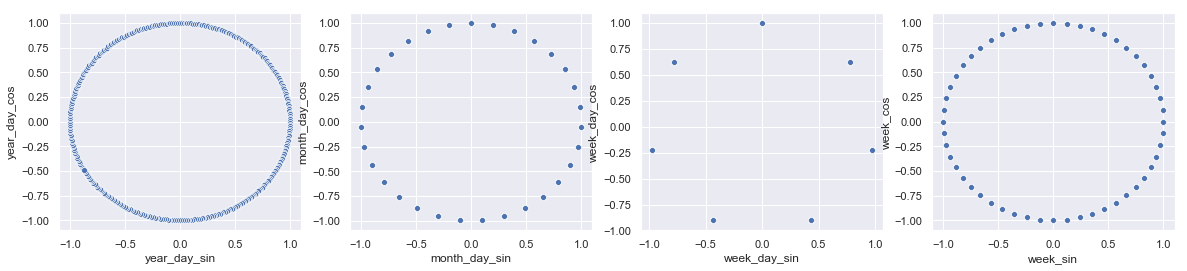

In [ ]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(20,4))

sns.scatterplot(data = df, x = "year_day_sin", y = "year_day_cos", ax = ax1);
sns.scatterplot(data = df, x = "month_day_sin", y = "month_day_cos", ax = ax2);
sns.scatterplot(data = df, x = "week_day_sin", y = "week_day_cos", ax = ax3);
sns.scatterplot(data = df, x = "week_sin", y = "week_cos", ax = ax4);

Finally, let's normalize everyone : 

In [ ]:
from sklearn.preprocessing import StandardScaler

y = np.array(df.Total)
X= df.drop(columns = ["Date", "Total"])
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### 3. Fitting the data

Let's see if with the closed form, we have something that works : 

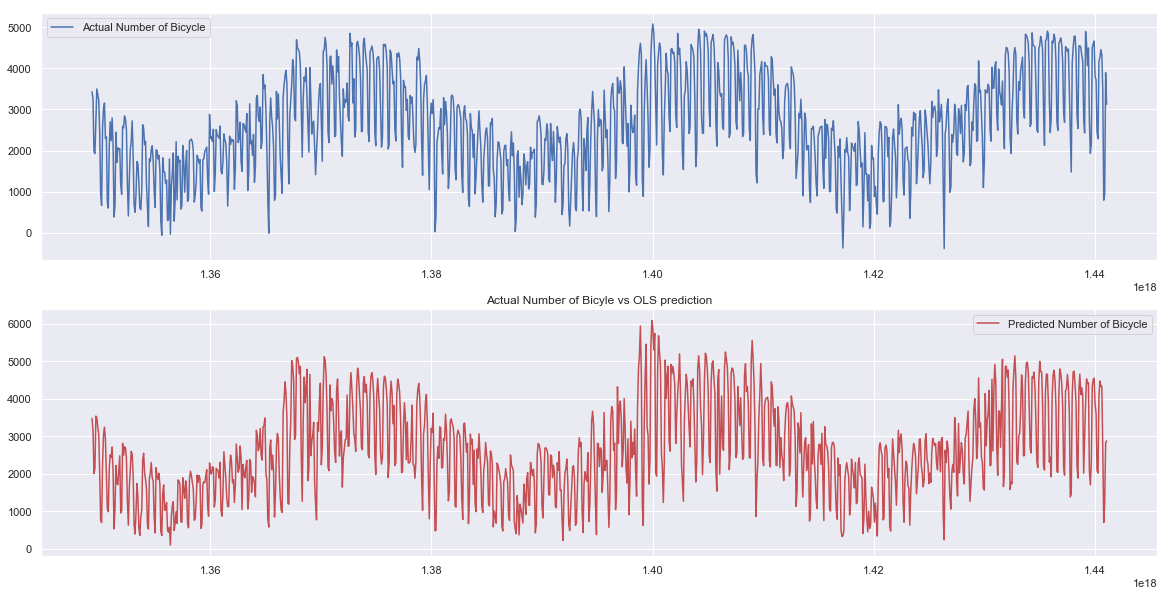

In [ ]:
OLS_model = MultivariateLinearRegression_ClosedForm()
OLS_model.fit(X_scaled, y)

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows = 2,figsize=(20,10))

ax1.plot(df.Date, OLS_model.predict(X_scaled), label = "Actual Number of Bicycle")
ax1.legend()


ax2.plot(df.Date, y, c = "r", label = "Predicted Number of Bicycle")
ax2.legend()
plt.title("Actual Number of Bicyle vs OLS prediction");

We have something that looks pretty neat ! We can do this for all models, but with a real data science approach : split in training and test test, and compare the MSE to the baseline : just 1 day shift. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
     
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y, test_size = 0.2, random_state = 42)

mse_scores = []
rmse_scores = []
mae_scores = []

models = {"CF" : MultivariateLinearRegression_ClosedForm(), 
          "GD" : MultivariateLinearRegression_GradientDescent(), 
          "RIDGE" : RidgeRegularization(alpha = 0.1), 
          "LASSO": LassoRegularization(alpha=0.1), 
          "ROBUST": RobustRegression(potential="huber", k = 1.345)}

for name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = round(mean_squared_error(y_test, y_pred),3)
    rmse = round( mean_squared_error(y_test, y_pred,squared = False), 3)
    mae = round(mean_absolute_error(y_test, y_pred), 3)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

We store the results into a dataframe to plot them easily with plotly, and add the baseline shift. 

In [ ]:
df_scores = pd.DataFrame(columns=["model", "MSE", "RMSE", "MAE"])

#Adding the baseline
y_test_baseline = daily.Total[:-1]
mse_scores.append(round(mean_squared_error(y_test_baseline, y),3))
rmse_scores.append(round( mean_squared_error(y_test_baseline, y,squared = False), 3))
mae_scores.append(round(mean_absolute_error(y_test_baseline, y), 3))

df_scores["model"] = ['CF', 'GD', 'RIDGE', 'LASSO', 'ROBUST','BASELINE']
df_scores["MSE"] = mse_scores
df_scores["RMSE"] = rmse_scores
df_scores["MAE"] = mae_scores

df_scores

,model,MSE,RMSE,MAE
0,CF,154796.040,393.441,293.276
1,GD,163371.816,404.193,300.270
2,RIDGE,151002.807,388.591,289.043
3,LASSO,160288.299,400.360,296.480
4,ROBUST,484193.634,695.840,548.264
5,BASELINE,951976.304,975.693,716.823


In [ ]:
fig = px.bar(df_scores, x='model', y='RMSE', width=1000)
fig.show()

In [ ]:
fig = px.bar(df_scores, x='model', y='MAE', width=1000)
fig.show()

We can see that the Ridge Regression is the one that performs the best ! Let's see which features contributated the most. 

In [ ]:
ridge = RidgeRegularization(alpha = 0.05)
ridge.fit(X_train, y_train)
coefficients = ridge.coef_
feature_coefficients = list(zip(X.columns, coefficients))


sorted_features = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)
top_10_features = sorted_features[:10]
top_10_features

[('Mon', 2630.849632223421),
 ('year_day_cos', 2452.6882366467044),
 ('week_cos', -2383.5524745424827),
 ('month_sin', 1047.8532665579382),
 ('week_day_sin', -642.1188278189413),
 ('year_day_sin', 403.6835230431835),
 ('month_day_sin', 298.31239448318735),
 ('dry day', 297.6628411059409),
 ('Sun', -285.20300257064474),
 ('month_cos', 275.41869130039294)]

Conclusion : 
1. Ridge regression performs best with the lowest RMSE. 
2. The baseline is by far the worst model, so it was necessary to add some other features. 
3. The boolean "Monday" has the higher coefficient, followed almost exclusively by cos and sin features : the preprocessing was necessary. 
4. Finally, it's not the weather features that explains the most the target. 

It is evident that we have missed some key features, especially during the summer time.
Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).